<a id='notebook-top'></a>
This notebook plots instrumental widths of the green and red detectors. Link to [Figure 17](#figure-17).

(The internal hyperlink only works on [GitHub Pages](https://yjzhu-solar.github.io/Eclipse2017/ipynb_html/plot_instwidth.html) or [nbviewer](https://nbviewer.org/github/yjzhu-solar/Eclipse2017/blob/master/ipynb/eclipse_calib/plot_instwidth.ipynb). Do not click when viewing the notebook on GitHub.)

In [1]:
import matplotlib.pyplot as plt
import h5py
import numpy as np
import juanfit

In [2]:
with h5py.File("../../sav/Eclipse/InstWidth/HeI_D3_2_width_red_curcorr.h5", 'r') as hf:
    HeI_D3_red_fwhm_curcorr = hf["HeI_D3_fwhm"][:][:,0]
    HeI_D3_red_fwhm_curcorr_err = hf["HeI_D3_fwhm_err"][:][:,0]

with h5py.File("../../sav/Eclipse/InstWidth/HeI_D3_2_width_red_uncorr.h5", 'r') as hf:
    HeI_D3_red_fwhm_uncorr = hf["HeI_D3_fwhm_uncorr"][:]
    HeI_D3_red_fwhm_uncorr_err = hf["HeI_D3_fwhm_uncorr_err"][:]
    HeI_D3_red_fwhm_ccdy = hf["HeI_D3_fwhm_ccdy"][:]

In [3]:
with h5py.File("../../sav/Eclipse/InstWidth/HeI_D3_2_width_green_curcorr.h5", 'r') as hf:
    HeI_D3_green_fwhm_curcorr = hf["HeI_D3_fwhm"][:][:,0]
    HeI_D3_green_fwhm_curcorr_err = hf["HeI_D3_fwhm_err"][:][:,0]

with h5py.File("../../sav/Eclipse/InstWidth/HeI_D3_2_width_green_uncorr.h5", 'r') as hf:
    HeI_D3_green_fwhm_uncorr = hf["HeI_D3_fwhm_uncorr"][:]
    HeI_D3_green_fwhm_uncorr_err = hf["HeI_D3_fwhm_uncorr_err"][:]
    HeI_D3_green_fwhm_ccdy = hf["HeI_D3_fwhm_ccdy"][:]

<a id='figure-17'></a>
### Figure 17
[back to top](#notebook-top) 

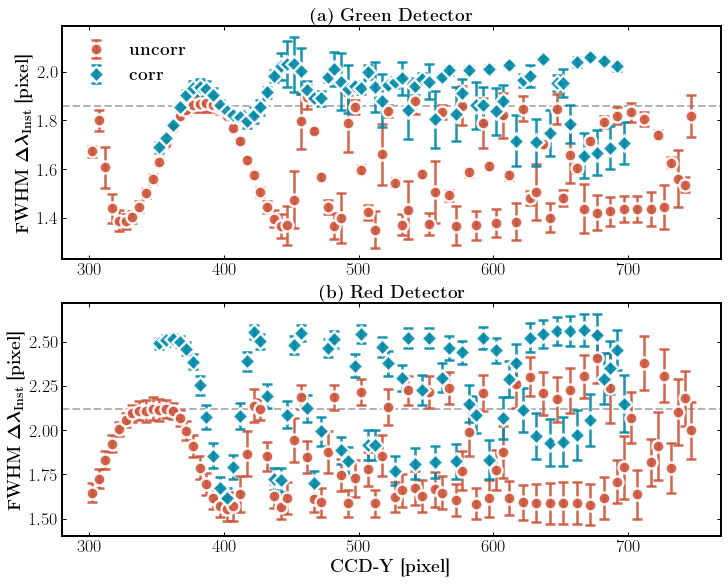

In [4]:
fig, (ax1,ax2) = plt.subplots(2,1,figsize=(10,8),constrained_layout=True)

ax1.errorbar(HeI_D3_green_fwhm_ccdy,HeI_D3_green_fwhm_uncorr,HeI_D3_green_fwhm_uncorr_err,
            color="#CC543A",ls="none",marker="o",
            markersize=12,capsize=5,lw=2.5,zorder=15,markeredgecolor='white',
            markeredgewidth=2.5,alpha=0.9,capthick=2.5,label=r"\textbf{uncorr}")
ax1.errorbar(np.arange(352, 700, 5), HeI_D3_green_fwhm_curcorr, HeI_D3_green_fwhm_curcorr_err, 
            color="#0089A7",ls="none",marker="D",
            markersize=12,capsize=5,lw=2.5,zorder=15,markeredgecolor='white',
            markeredgewidth=2.5,alpha=0.9,capthick=2.5,label=r"\textbf{corr}")
ax1.legend(fontsize=18,loc="upper left",frameon=False)
ax1.set_title(r"\textbf{(a) Green Detector}",fontsize=18)
ax1.axhline(1.86,color="#B3B3B3",ls="--",lw=2,zorder=0)

ax2.errorbar(HeI_D3_red_fwhm_ccdy,HeI_D3_red_fwhm_uncorr,HeI_D3_red_fwhm_uncorr_err,
            color="#CC543A",ls="none",marker="o",
            markersize=12,capsize=5,lw=2.5,zorder=15,markeredgecolor='white',
            markeredgewidth=2.5,alpha=0.9,capthick=2.5,label=r"\textbf{uncorr}")
ax2.errorbar(np.arange(352, 700, 5), HeI_D3_red_fwhm_curcorr, HeI_D3_red_fwhm_curcorr_err, 
            color="#0089A7",ls="none",marker="D",
            markersize=12,capsize=5,lw=2.5,zorder=15,markeredgecolor='white',
            markeredgewidth=2.5,alpha=0.9,capthick=2.5,label=r"\textbf{corr}")
ax2.set_title(r"\textbf{(b) Red Detector}",fontsize=18)
ax2.axhline(2.12,color="#B3B3B3",ls="--",lw=2,zorder=0)

for ax_ in (ax1,ax2):
    ax_.tick_params(labelsize=18,direction="in",top=True,right=True)
    ax_.set_ylabel(r"\textbf{FWHM} $\boldsymbol{\Delta \lambda_{\rm Inst}}$ \textbf{[pixel]}",
                   fontsize=18)
    
ax2.set_xlabel(r"\textbf{CCD-Y [pixel]}",fontsize=18)
plt.savefig(fname="../../figs/ms/inst_width.pdf",format="pdf",dpi=300,bbox_inches="tight")